In [3]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('aapl_all_csv.csv')
# Inspect the data
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2021-12-31 13:30:00-05:00,177.610001,177.695007,177.570007,177.595001,177.595001,0
1,2021-12-31 13:31:00-05:00,177.595001,177.619995,177.500000,177.549896,177.549896,94884
2,2021-12-31 13:32:00-05:00,177.550003,177.660004,177.541000,177.639999,177.639999,71624
3,2021-12-31 13:33:00-05:00,177.639999,177.778900,177.630096,177.750000,177.750000,143784
4,2021-12-31 13:34:00-05:00,177.740005,177.910004,177.740005,177.785797,177.785797,276125


In [28]:
df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values

# Get the number of rows to train the model and validations
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.81304441, 0.81144125, 0.81464378, 0.81855352, 0.81982585,
       0.81926453, 0.81677626, 0.81428854, 0.81392572, 0.81428854,
       0.81215931, 0.81049595, 0.8085945 , 0.80895678, 0.80789053,
       0.80639801, 0.80504378, 0.80735741, 0.80824631, 0.80789053,
       0.80717953, 0.80966399, 0.80771319, 0.80824957, 0.80931256,
       0.81073403, 0.81073403, 0.81108927, 0.8103788 , 0.81144505,
       0.81091192, 0.81304441, 0.81375542, 0.8123334 , 0.8132223 ,
       0.81251129, 0.81499901, 0.81215605, 0.81002302, 0.81073403,
       0.81208826, 0.8103788 , 0.81128831, 0.8103788 , 0.8132223 ,
       0.81251129, 0.81073403, 0.81002302, 0.80966779, 0.80966779,
       0.80967159, 0.80860154, 0.80745015, 0.80522492, 0.80362556,
       0.80433657, 0.80504703, 0.80504703, 0.80575805, 0.80611328])]
[0.8091346667936978]

[array([0.81304441, 0.81144125, 0.81464378, 0.81855352, 0.81982585,
       0.81926453, 0.81677626, 0.81428854, 0.81392572, 0.81428854,
       0.81215931, 0.81049595, 0.808

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import array

# Build the LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True, activation='relu' ))
model.add(LSTM(64, return_sequences=True, activation='relu' ))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=20)

Epoch 1/8
792/792 [==============================] - 37s 40ms/step - loss: 0.0030
Epoch 2/8
792/792 [==============================] - 33s 41ms/step - loss: 7.0196e-04
Epoch 3/8
792/792 [==============================] - 32s 40ms/step - loss: 3.8523e-04
Epoch 4/8
792/792 [==============================] - 59s 75ms/step - loss: 3.0472e-04
Epoch 5/8
792/792 [==============================] - 51s 65ms/step - loss: 2.3660e-04
Epoch 6/8
792/792 [==============================] - 53s 66ms/step - loss: 2.0285e-04
Epoch 7/8
792/792 [==============================] - 55s 69ms/step - loss: 1.6094e-04
Epoch 8/8
792/792 [==============================] - 51s 64ms/step - loss: 1.5756e-04


In [7]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test) ** 2)))
rmse

0.18395527559568828

In [8]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions3'] = predictions3

mape(valid_3['Close'], valid_3['Predictions3'])

<ipython-input-8-cda6690b5d4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions3'] = predictions3


0.07727229131243533

In [9]:
valid_3['Predictions3']

12732    171.328659
12733    171.338608
12734    171.314987
12735    171.245789
12736    171.218369
            ...    
13397    167.274689
13398    167.413086
13399    167.369843
13400    167.231873
13401    167.115051
Name: Predictions3, Length: 670, dtype: float32

In [ ]:
#forecasting

In [10]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.95
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Datetime'][:split]
date_test = df['Datetime'][split:]

In [11]:
#close_data = close_data.reshape((-1))
close_data = y_train
look_back = 60

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    #last_date = df['Datetime'].values[-1]
    last_date = date_train.values[-1]
    prediction_dates = pd.date_range(last_date, freq="min", periods=num_prediction+1).tolist()
    return prediction_dates

In [12]:
num_prediction = 5
#forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)


forecast = predict(num_prediction, model)
reshape_forecast = np.reshape(forecast,(forecast.shape[0],1))

result = scaler.inverse_transform(reshape_forecast)
result

array([[171.4450073 ],
       [171.32867103],
       [171.33860376],
       [171.2877243 ],
       [171.23961184],
       [171.23137789]])

In [13]:
print(len(close_data))

12672


In [14]:
actual_values=[171.4450073, 171.3699951,171.2998962,171.3000031, 171.2799988, 171.1900024]

In [15]:
actual_values

[171.4450073, 171.3699951, 171.2998962, 171.3000031, 171.2799988, 171.1900024]

In [16]:
mape(actual_values,result)

0.050347291806280864

In [17]:
rmse = np.sqrt(np.mean(((result - actual_values) ** 2)))
rmse

0.10666342276294634

In [36]:
result_forecast = pd.DataFrame(result)

actual_df = pd.DataFrame(actual_values)


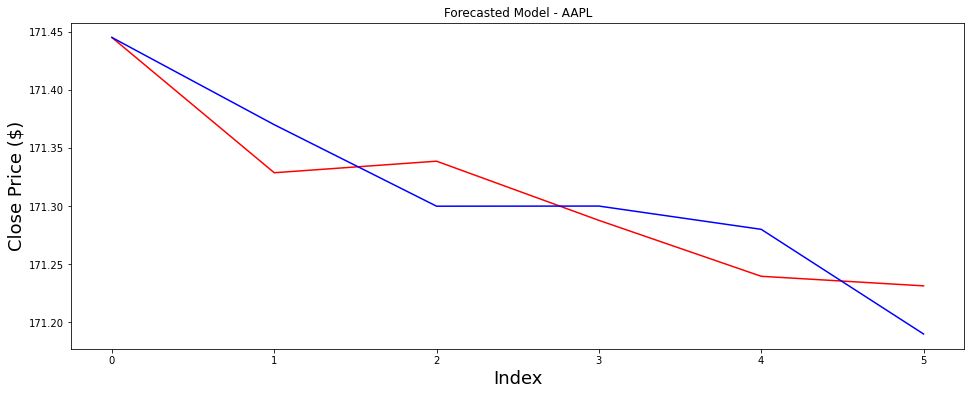

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Forecasted Model - AAPL')
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
#plt.plot(train['Close'], 'b-', label = 'train')
plt.plot(result_forecast,'r-', label = 'predict')
plt.plot(actual_df,'b-', label = 'actual')
#plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()